In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np;

In [ ]:
dataset= pd.read_csv('diabetes-dataset.csv')
print(dataset)
dataset = dataset.dropna()

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.127   47        1  
1    

In [ ]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


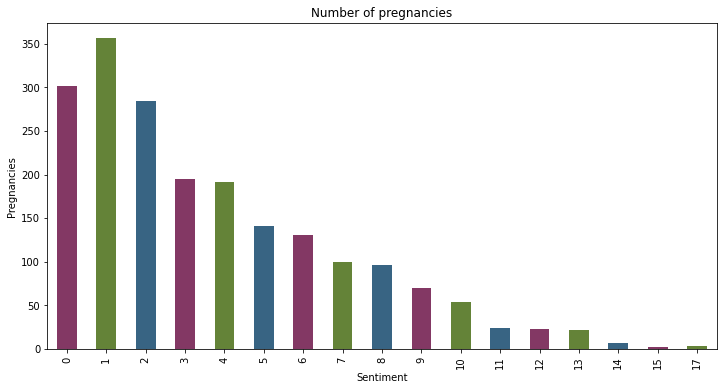

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Number of pregnancies")
colors = ['#833864','#648338','#386483']

dataset['Pregnancies'].value_counts().sort_index().plot.bar(color=colors)
plt.xlabel("Sentiment")
plt.ylabel("Pregnancies")
plt.show()

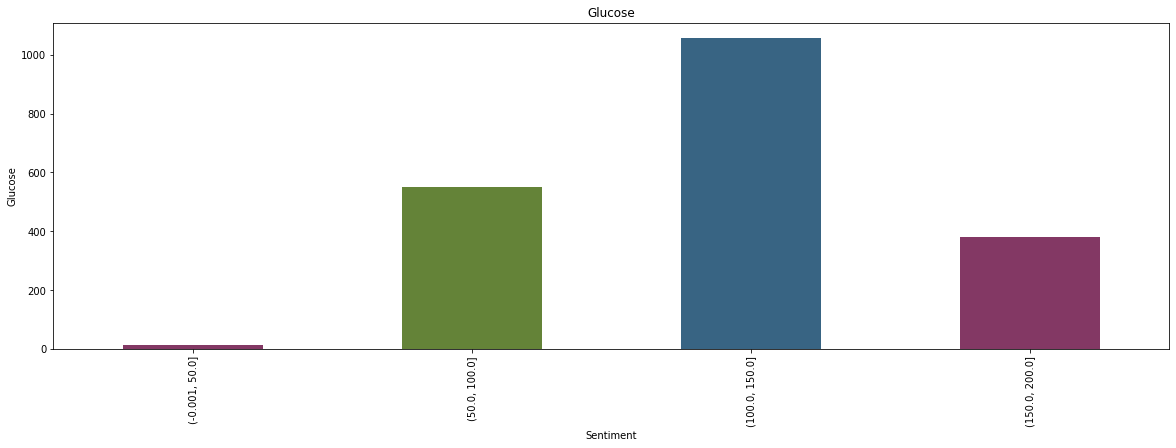

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Glucose")
colors = ['#833864','#648338','#386483']

dataset['Glucose'].value_counts(bins=[0,50,100,150,200]).sort_index().plot.bar(color=colors)
plt.xlabel("Sentiment")
plt.ylabel("Glucose")
plt.show()

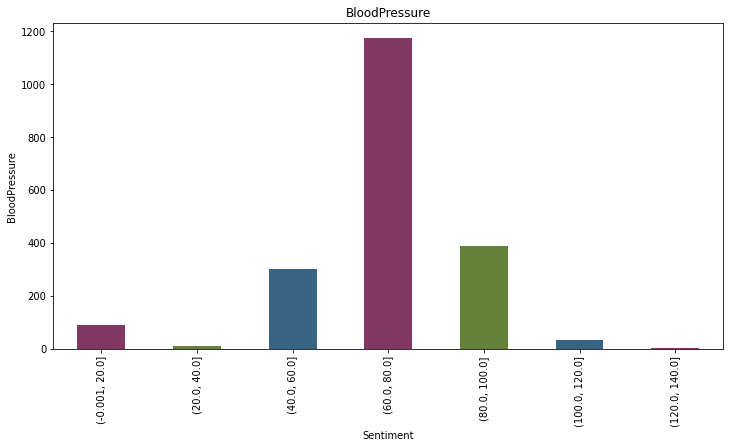

In [ ]:
plt.figure(figsize=(12,6))
plt.title("BloodPressure")
colors = ['#833864','#648338','#386483']

dataset['BloodPressure'].value_counts(bins=[0,20,40,60,80,100,120,140]).sort_index().plot.bar(color=colors)
plt.xlabel("Sentiment")
plt.ylabel("BloodPressure")
plt.show()

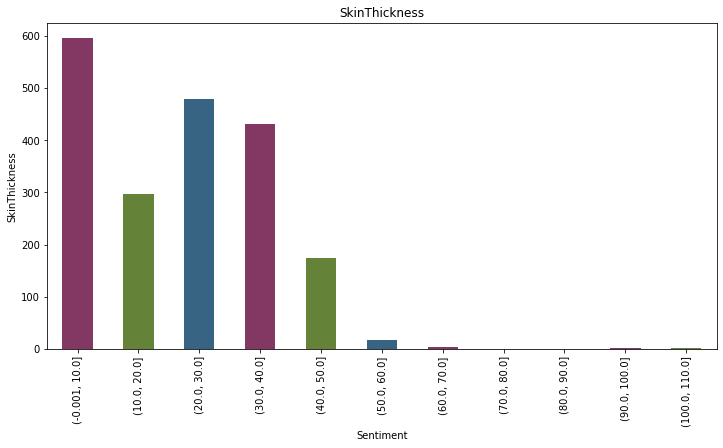

In [ ]:
plt.figure(figsize=(12,6))
plt.title("SkinThickness")
colors = ['#833864','#648338','#386483']

dataset['SkinThickness'].value_counts(bins=[0,10,20,30,40,50,60,70,80,90,100,110]).sort_index().plot.bar(color=colors)
plt.xlabel("Sentiment")
plt.ylabel("SkinThickness")
plt.show()

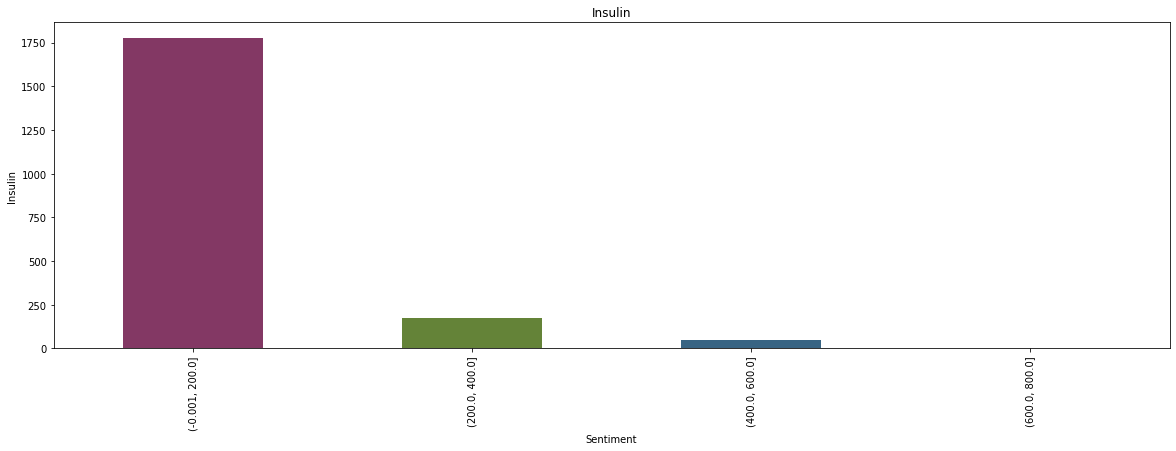

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Insulin")
colors = ['#833864','#648338','#386483']

dataset['Insulin'].value_counts(bins=[0,200,400,600,800]).sort_index().plot.bar(color=colors)
plt.xlabel("Sentiment")
plt.ylabel("Insulin")
plt.show()

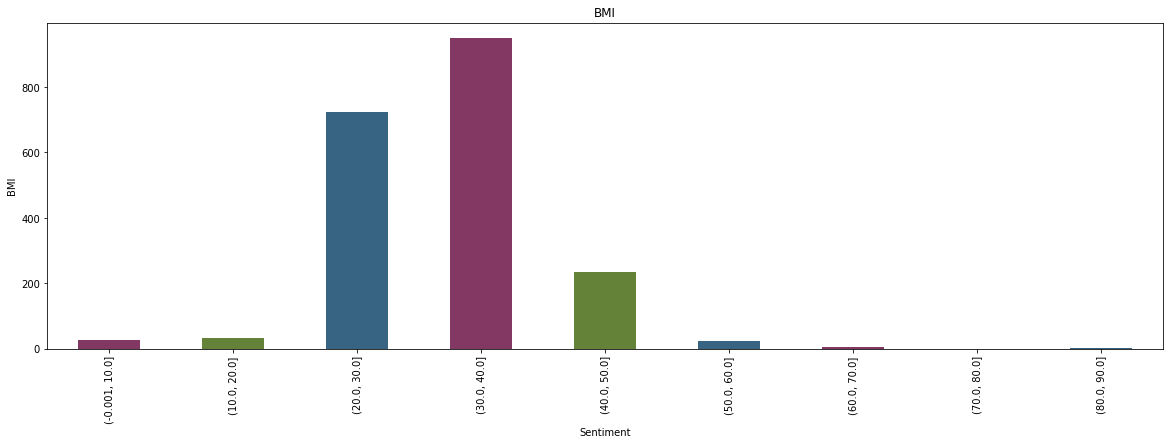

In [ ]:
plt.figure(figsize=(20,6))
plt.title("BMI")
colors = ['#833864','#648338','#386483']

dataset['BMI'].value_counts(bins=[0,10,20,30,40,50,60,70,80,90]).sort_index().plot.bar(color=colors)
plt.xlabel("Sentiment")
plt.ylabel("BMI")
plt.show()

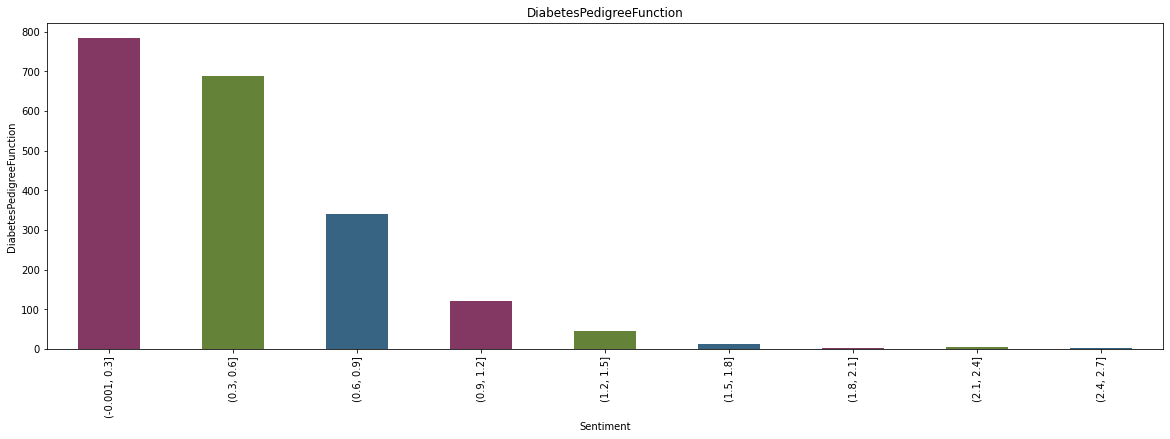

In [ ]:
plt.figure(figsize=(20,6))
plt.title("DiabetesPedigreeFunction")
colors = ['#833864','#648338','#386483']

dataset['DiabetesPedigreeFunction'].value_counts(bins=[0,0.30,0.60,0.90,1.2,1.5,1.8,2.1,2.4,2.7
                                                      ]).sort_index().plot.bar(color=colors)
plt.xlabel("Sentiment")
plt.ylabel("DiabetesPedigreeFunction")
plt.show()

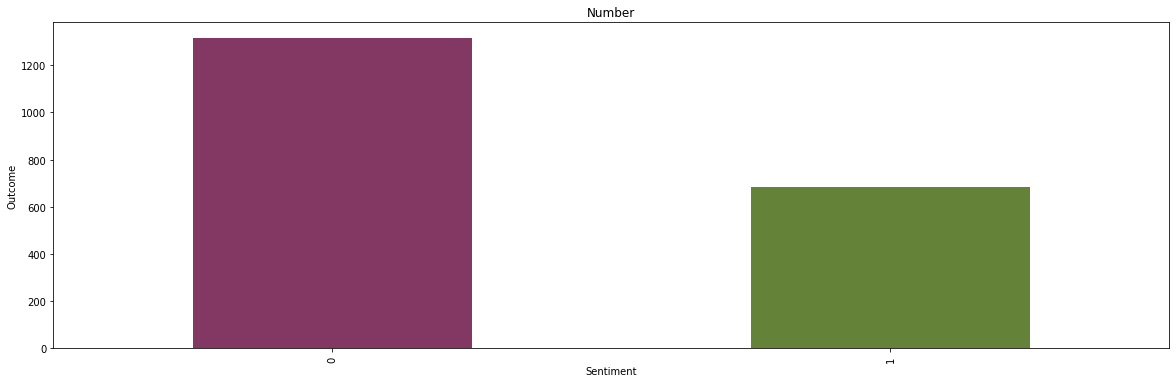

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Number")
colors = ['#833864','#648338','#386483']

dataset['Outcome'].value_counts().sort_index().plot.bar(color=colors)
plt.xlabel("Sentiment")
plt.ylabel("Outcome")
plt.show()

In [ ]:
df=dataset
dfx=df.drop("Outcome",axis=1)
df1=dfx.drop("Age",axis=1)
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,2,138,62,35,0,33.6,0.127
1,0,84,82,31,125,38.2,0.233
2,0,145,0,0,0,44.2,0.630
3,0,135,68,42,250,42.3,0.365
4,1,139,62,41,480,40.7,0.536
...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370
1996,8,179,72,42,130,32.7,0.719
1997,6,85,78,0,0,31.2,0.382
1998,0,129,110,46,130,67.1,0.319


In [ ]:
vectors=df1.values.tolist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(vectors, dataset['Outcome'], test_size=0.33,
                                                    random_state=42)


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train);

In [ ]:

import seaborn as sns; sns.set_theme()
from sklearn import metrics, __all__

Accuracy: 0.7984848484848485


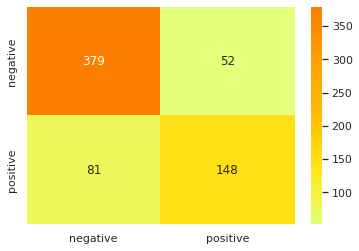

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
uniform_data = np.random.rand(10, 12)
axis_labels = ["negative", "positive"] 

# create seabvorn heatmap with required labels
ax = sns.heatmap(confusion_matrix(y_test, y_pred),cmap="Wistia",xticklabels=axis_labels, yticklabels=axis_labels,annot=True,fmt="d")

In [ ]:
d0=dataset[dataset["Outcome"]==0]
d1=dataset[dataset["Outcome"]==1]


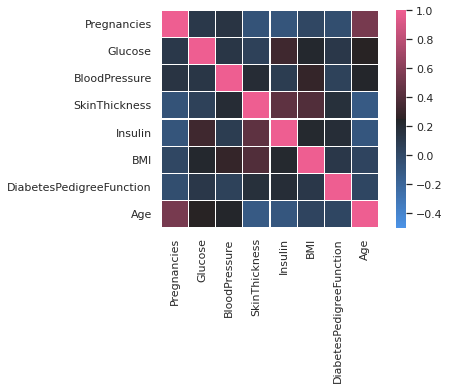

In [ ]:
corr = dataset.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center="dark",as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, Linewidths=.2)

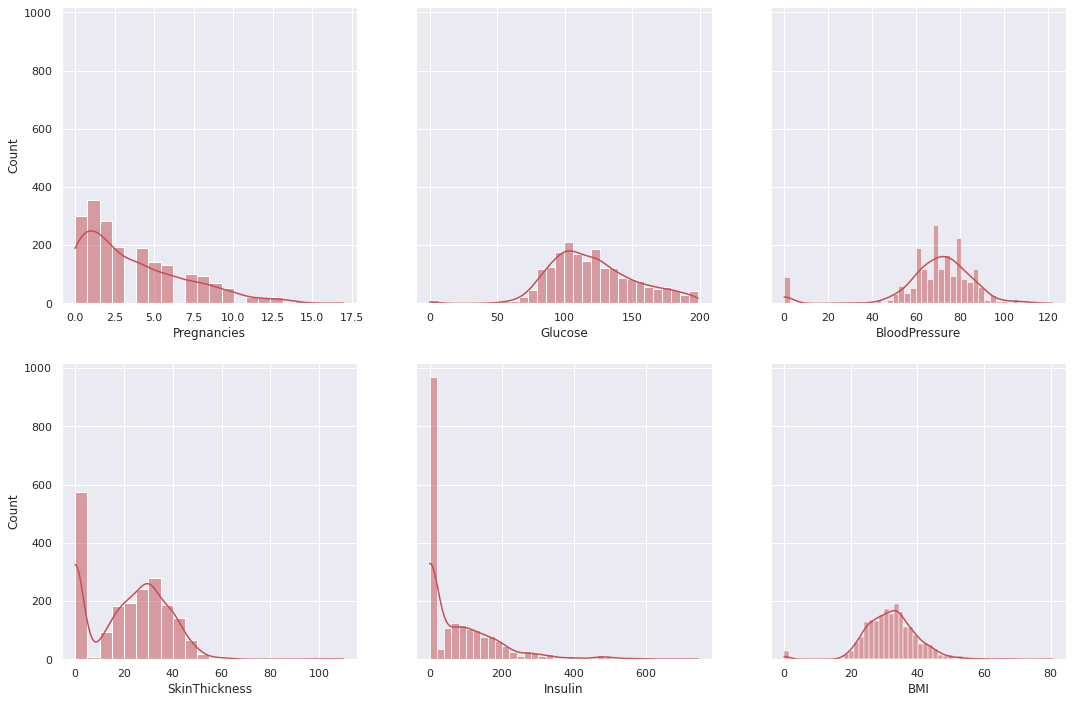

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(18,12), sharey=True)
sns.histplot(dataset, ax=axes[0,0], x="Pregnancies", kde=True, color='r')
sns.histplot(dataset, ax=axes[0,1], x="Glucose", kde=True, color='r')
sns.histplot(dataset, ax=axes[0,2], x="BloodPressure", kde=True, color='r')
sns.histplot(dataset, ax=axes[1,0], x="SkinThickness", kde=True, color='r')
sns.histplot(dataset, ax=axes[1,1], x="Insulin", kde=True, color='r')
sns.histplot(dataset, ax=axes[1,2], x="BMI", kde=True, color='r')


In [ ]:
# fig, axes = plt.subplots(1,3, figsize=(18,6), sharey=True)
# sns.histplot(dataset, ax=axes[0], x="SkinThickness", kde=True, color='r')
# sns.histplot(dataset, ax=axes[1], x="Insulin", kde=True, color='r')
# sns.histplot(dataset, ax=axes[2], x="BMI", kde=True, color='r')

In [ ]:
# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
 total_rows = sum([summaries[label][0][2] for label in summaries])
 probabilities = dict()
 for class_value, class_summaries in summaries.items():
  probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
  for i in range(len(class_summaries)):
    mean, stdev, count = class_summaries[i]
    probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
 return probabilities

In [ ]:

# Predict the class for a given row
def predict(summaries, row):
 probabilities = calculate_class_probabilities(summaries, row)
 best_label, best_prob = None, -1
 for class_value, probability in probabilities.items():
  if best_label is None or probability > best_prob:
    best_prob = probability
  best_label = class_value
 return best_label
 
# Naive Bayes Algorithm
def naive_bayes(train, test):
 summarize = summarize_by_class(train)
 predictions = list()
 for row in test:
  output = predict(summarize, row)
  predictions.append(output)
 return(predictions)
 
# Test Naive Bayes on Iris Dataset

scores = evaluate_algorithm(dataset, naive_bayes, n_folds)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

IndentationError: ignored